<a href="https://colab.research.google.com/github/ssunwalka01/peopleinteractive/blob/master/Shubham_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Classification Problem (Targeting to whether the customers bought a specific product or not).

- Loading the Libraries

In [144]:
# importing libraries
import pandas as pd # for data handling
import numpy as np # for mathematical calculations
import seaborn as sns # for data visualisations
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import warnings # to ignore warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

- Reading the Dataset

In [145]:
# training data
data = pd.read_table('/content/Dataset.txt', sep = '\t')
data.to_csv("data_train.csv", index = False)
# test data
test = pd.read_table('/content/Dataset_test.txt', sep = '\t')
test.to_csv("data_test.csv", index = False)

In [146]:
train = pd.read_csv("/content/data_train.csv")
data_test = pd.read_csv("/content/data_test.csv")

In [147]:
# Keeping the original copy of data for future 
train_original = train.copy()
data_test_copy = data_test.copy()

In [148]:
train.head()

Index        F1        F2        F3        F4  ...  F19  F20  F21  F22  C
0      1  0.224506  0.500340  0.489860  0.902413  ...  706  305    1    2  0
1      2  0.321128  0.281119  0.907283  0.772159  ...  423  206   18    7  1
2      3  0.893441  0.622005  0.998776  0.098386  ...  703  315    1    4  0
3      4  0.320641  0.957234  0.346000  0.646479  ...  122  304   15    1  0
4      5  0.475961  0.623008  0.544988  0.159709  ...  486  240    1    1  0

[5 rows x 24 columns]

In [149]:
data_test.head()

Index        F1        F2        F3        F4  ...  F18  F19  F20  F21  F22
0  T30234341  0.654765  0.812009  0.603190  0.391039  ...    1  436  478    1    1
1  T30234342  0.694636  0.690568  0.473460  0.259760  ...    1  138   56   10    4
2  T30234343  0.203759  0.323301  0.492294  0.011448  ...    1  117  323   10    1
3  T30234344  0.319627  0.286247  0.906197  0.093840  ...    1  115  149   16   21
4  T30234345  0.236003  0.782784  0.285689  0.383585  ...    1  527  281    3    1

[5 rows x 23 columns]

In [150]:
print("Shape of Train data", train.shape)

Shape of Train data (101180, 24)


We have 101180 rows and 24 columns in the training data.

In [151]:
# getting column names of variables
print("\n Columns of data \n", train.columns)


 Columns of data 
 Index(['Index', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'C'],
      dtype='object')


In [152]:
# getting data types of variables
print("\n Data Types of data\n", train.dtypes)


 Data Types of data
 Index      int64
F1       float64
F2       float64
F3       float64
F4       float64
F5         int64
F6         int64
F7         int64
F8         int64
F9         int64
F10        int64
F11        int64
F12        int64
F13        int64
F14        int64
F15       object
F16       object
F17        int64
F18        int64
F19        int64
F20        int64
F21        int64
F22        int64
C          int64
dtype: object


0    75.462542
1    24.537458
Name: C, dtype: float64


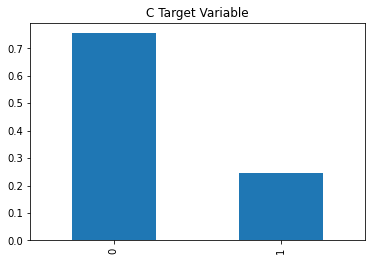

In [153]:
# TARGET VARIABLE
print(train['C'].value_counts(normalize=True)*100)   # percentage wise
train['C'].value_counts(normalize=True).plot.bar(title = "C Target Variable")

In [154]:
#
print(train['F15'].value_counts(normalize=True)*100)   # percentage wise
# train['F15'].value_counts(normalize=True).plot.bar(title = "F15")

3/13/1985     0.045464
7/6/1987      0.044475
5/29/1989     0.043487
4/9/1987      0.043487
8/29/1988     0.042499
                ...   
5/12/1977     0.000988
1/30/1996     0.000988
4/22/1998     0.000988
12/25/1977    0.000988
3/19/1979     0.000988
Name: F15, Length: 8031, dtype: float64


In [155]:
train['F15'].nunique()

8031

In [156]:
# campaign_type
print(train['F16'].value_counts(normalize=True)*100)   # percentage wise
# train['F16'].value_counts(normalize=True).plot.bar(title = "F16")

1/13/1991     0.054359
7/12/1990     0.052382
6/3/1990      0.051394
3/19/1990     0.051394
6/16/1990     0.050405
                ...   
6/5/1997      0.000988
4/28/1998     0.000988
12/20/1996    0.000988
8/7/1998      0.000988
7/2/1999      0.000988
Name: F16, Length: 6300, dtype: float64


In [157]:
train['F16'].nunique()

6300

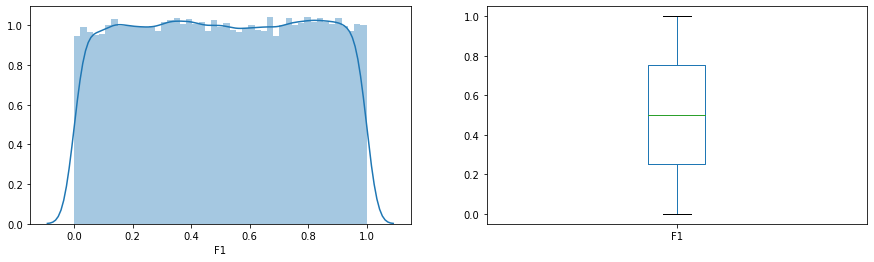

In [158]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F1']);
plt.subplot(122)
train['F1'].plot.box(figsize=(15,4)) 
plt.show()

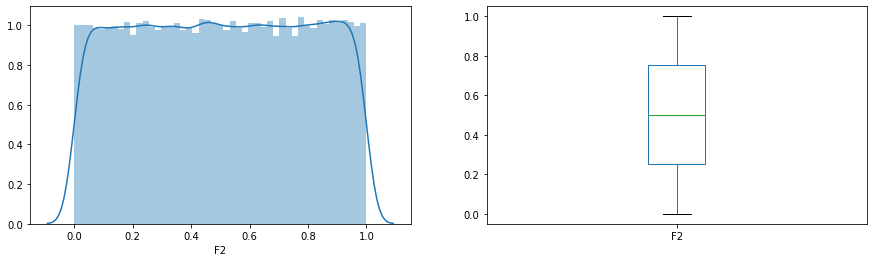

In [159]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F2']);
plt.subplot(122)
train['F2'].plot.box(figsize=(15,4)) 
plt.show()

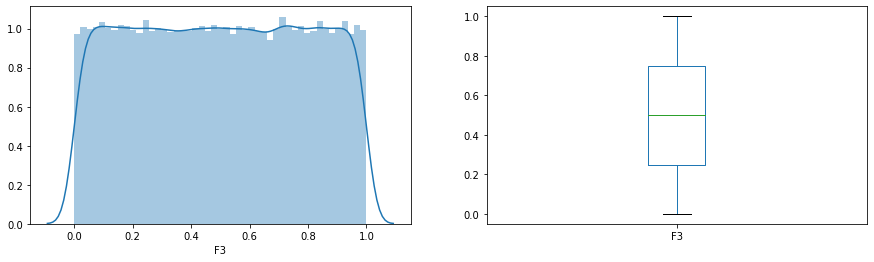

In [160]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F3']);
plt.subplot(122)
train['F3'].plot.box(figsize=(15,4)) 
plt.show()

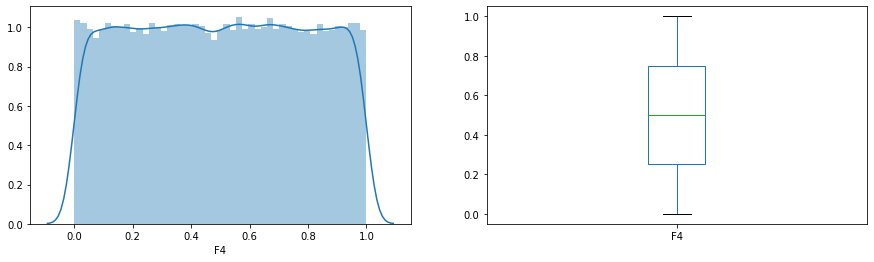

In [161]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F4']);
plt.subplot(122)
train['F4'].plot.box(figsize=(15,4)) 
plt.show()

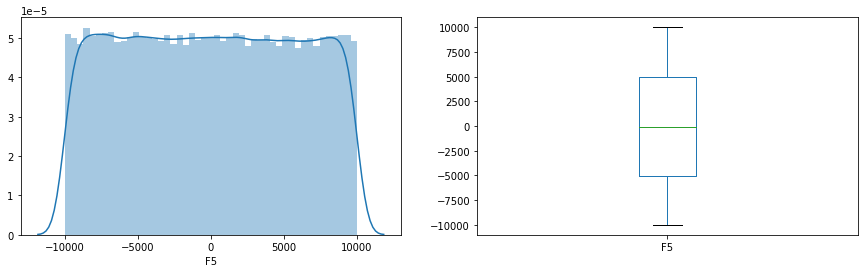

In [162]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F5']);
plt.subplot(122)
train['F5'].plot.box(figsize=(15,4)) 
plt.show()

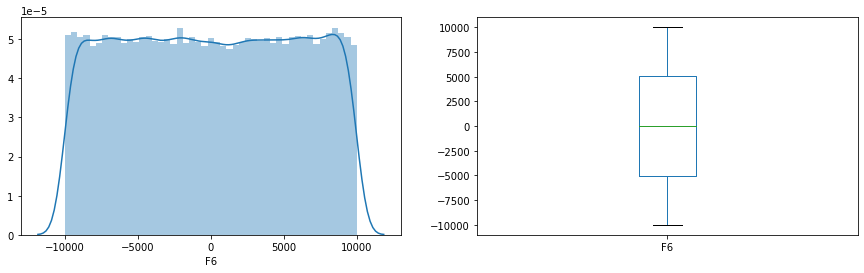

In [163]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F6']);
plt.subplot(122)
train['F6'].plot.box(figsize=(15,4)) 
plt.show()

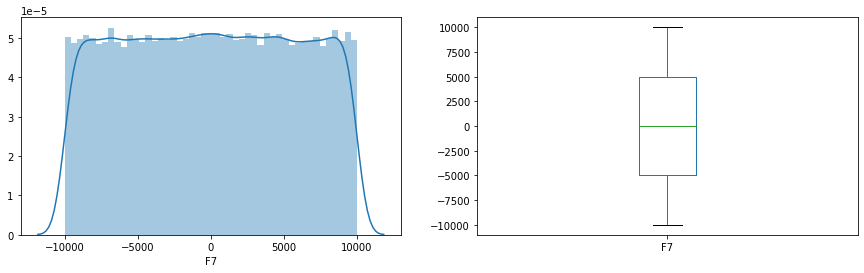

In [164]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F7']);
plt.subplot(122)
train['F7'].plot.box(figsize=(15,4)) 
plt.show()

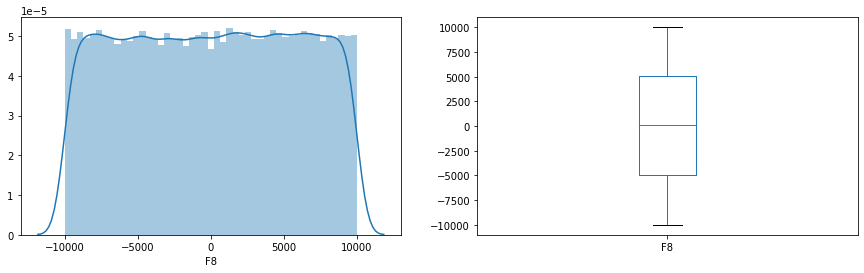

In [165]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F8']);
plt.subplot(122)
train['F8'].plot.box(figsize=(15,4)) 
plt.show()

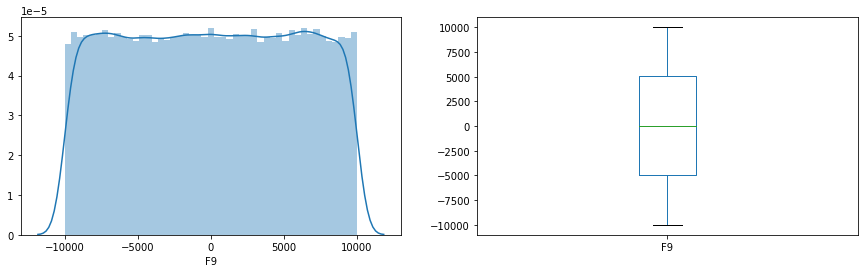

In [166]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F9']);
plt.subplot(122)
train['F9'].plot.box(figsize=(15,4)) 
plt.show()

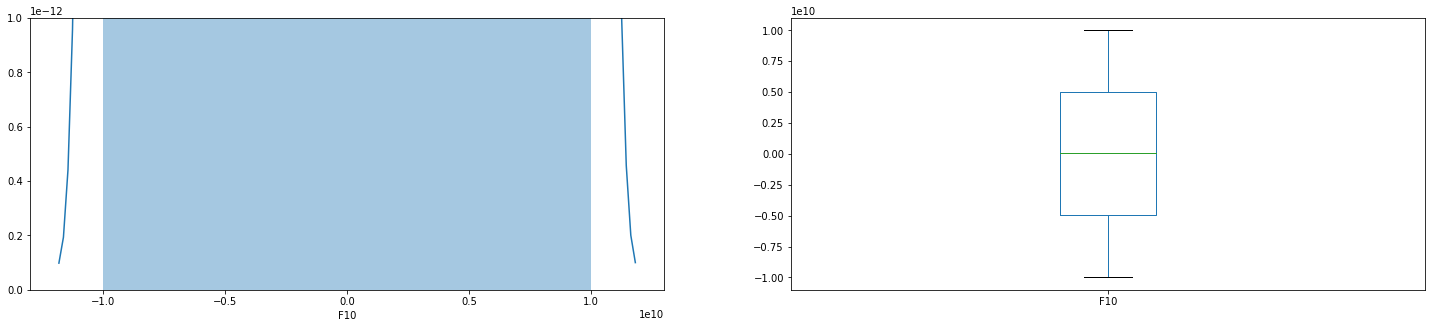

In [167]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F10']);
plt.subplot(122)
train['F10'].plot.box(figsize=(25,5)) 
plt.show()

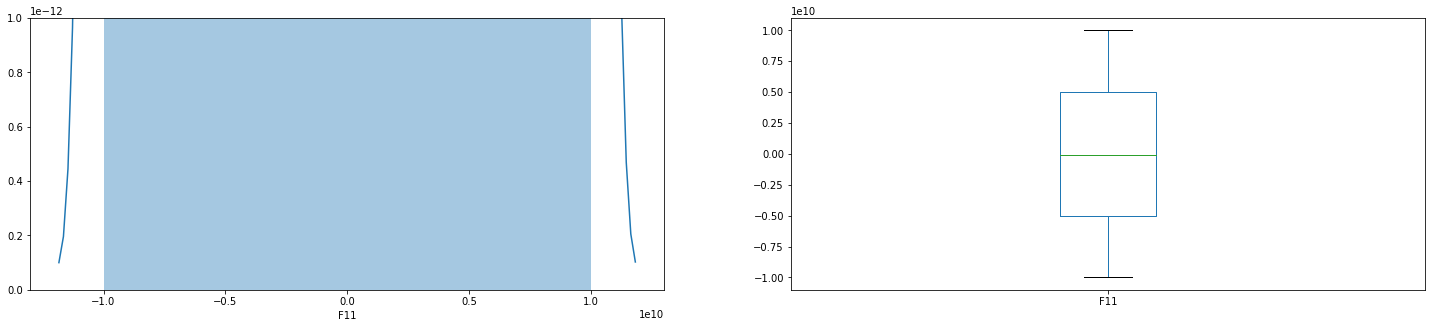

In [168]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F11']);
plt.subplot(122)
train['F11'].plot.box(figsize=(25,5)) 
plt.show()

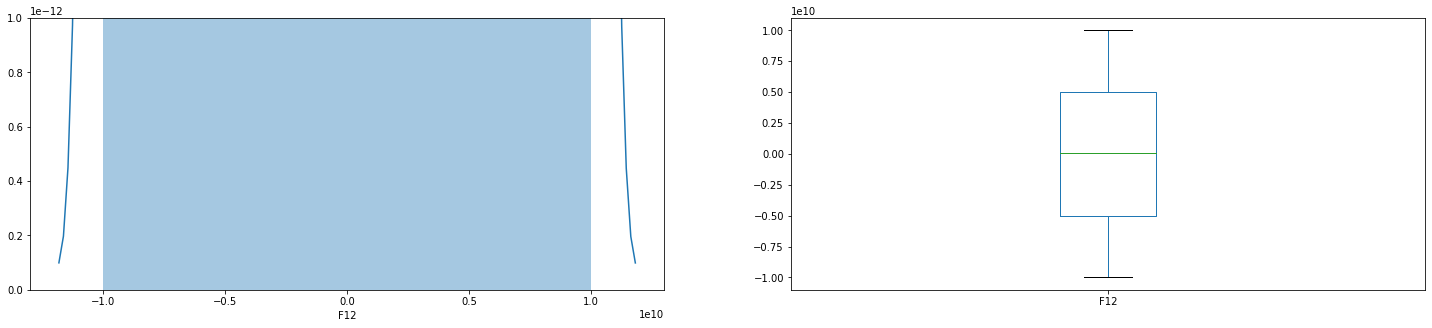

In [169]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F12']);
plt.subplot(122)
train['F12'].plot.box(figsize=(25,5)) 
plt.show()

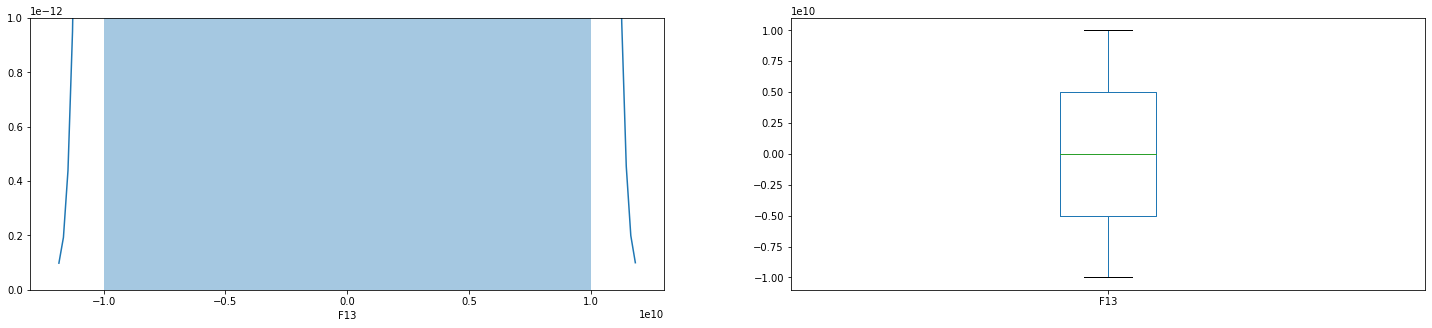

In [170]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F13']);
plt.subplot(122)
train['F13'].plot.box(figsize=(25,5)) 
plt.show()

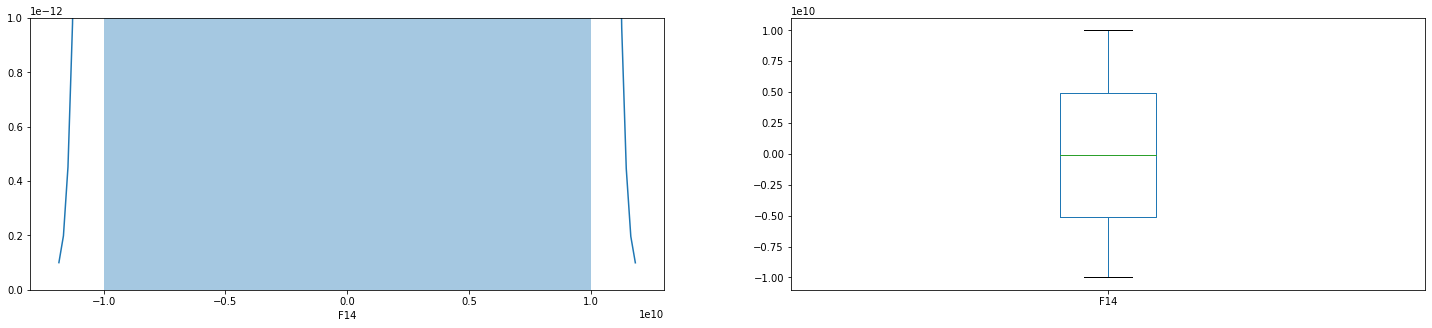

In [171]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F14']);
plt.subplot(122)
train['F14'].plot.box(figsize=(25,5)) 
plt.show()

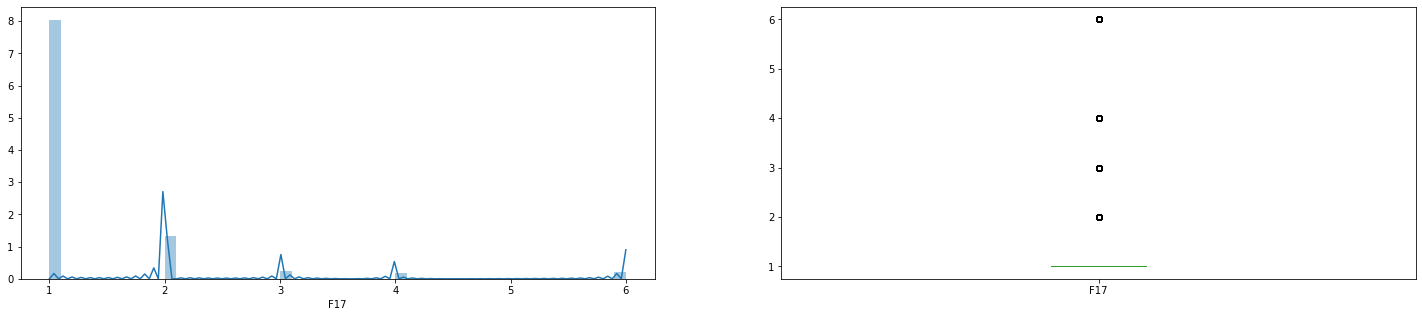

In [172]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F17']);
plt.subplot(122)
train['F17'].plot.box(figsize=(25,5)) 
plt.show()

1    80.371615
2    13.378138
3     2.397707
6     2.114054
4     1.738486
Name: F17, dtype: float64


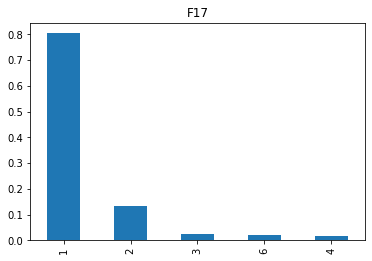

In [173]:
print(train['F17'].value_counts(normalize=True)*100)   # percentage wise
train['F17'].value_counts(normalize=True).plot.bar(title = "F17")

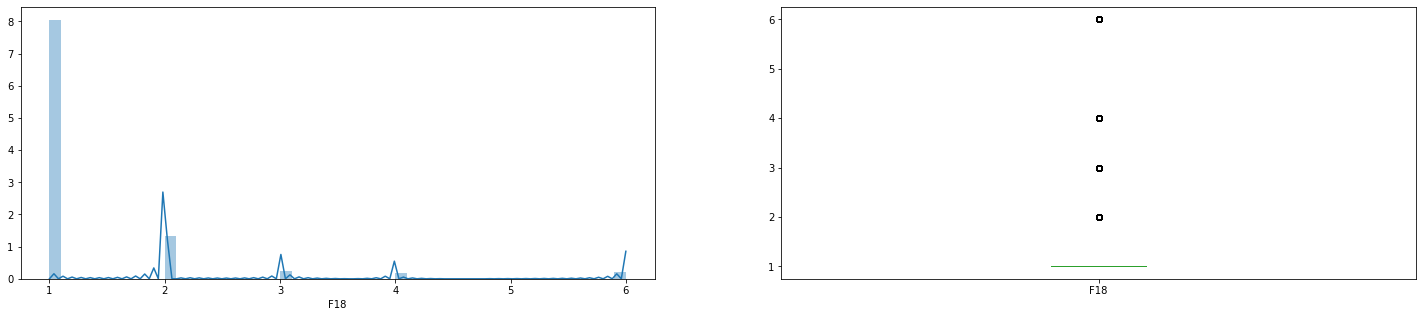

In [174]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F18']);
plt.subplot(122)
train['F18'].plot.box(figsize=(25,5)) 
plt.show()

1    80.482309
2    13.326744
3     2.407590
6     2.005337
4     1.778019
Name: F18, dtype: float64


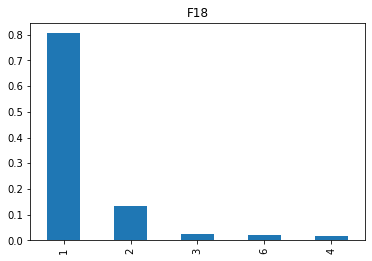

In [175]:
print(train['F18'].value_counts(normalize=True)*100)   # percentage wise
train['F18'].value_counts(normalize=True).plot.bar(title = "F18")

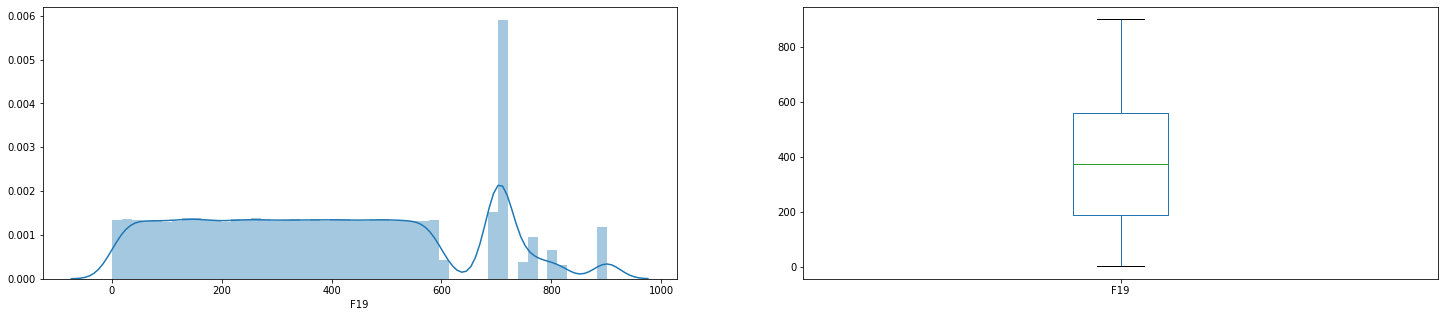

In [176]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F19']);
plt.subplot(122)
train['F19'].plot.box(figsize=(25,5)) 
plt.show()

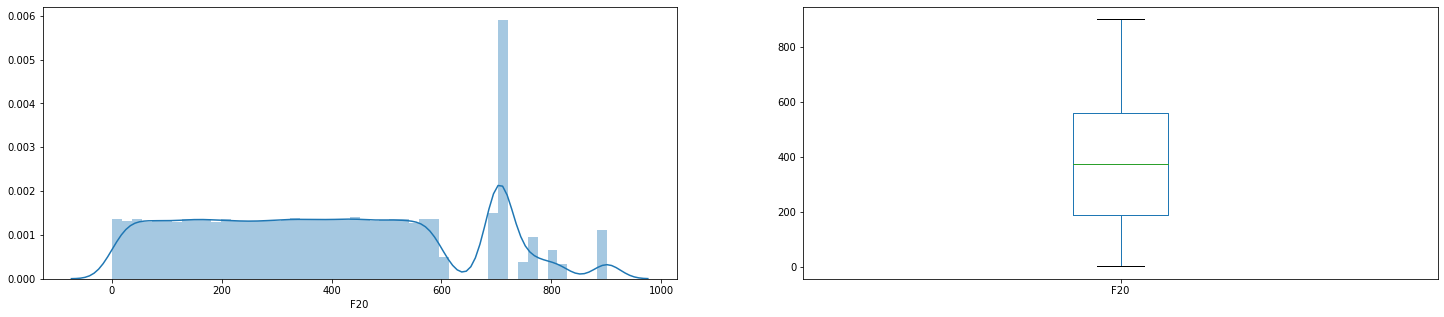

In [177]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F20']);
plt.subplot(122)
train['F20'].plot.box(figsize=(25,5)) 
plt.show()

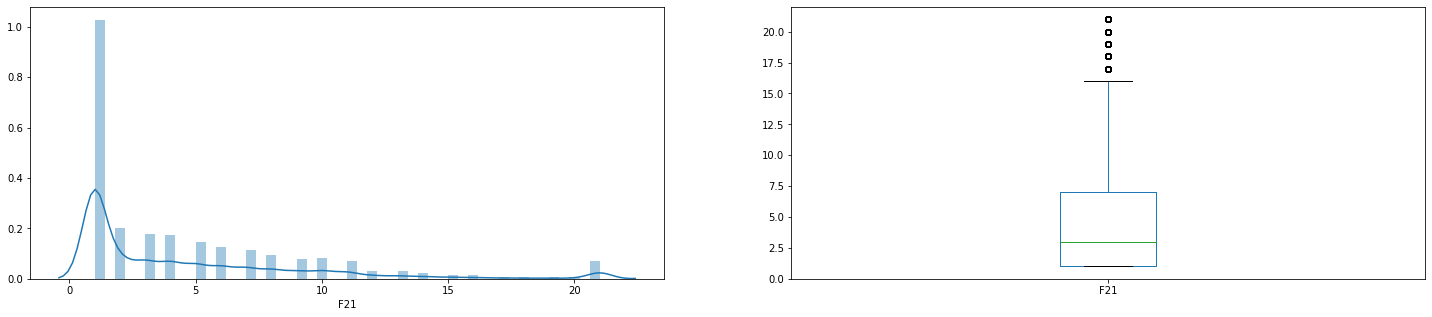

In [178]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F21']);
plt.subplot(122)
train['F21'].plot.box(figsize=(25,5)) 
plt.show()

1     41.080253
2      8.061870
3      7.144693
4      6.940107
5      5.843052
6      5.078079
7      4.494959
8      3.777426
10     3.222969
9      3.163669
11     2.801937
21     2.774264
12     1.270014
13     1.209725
14     0.899387
15     0.642419
16     0.531726
17     0.315280
18     0.262898
19     0.246096
20     0.239178
Name: F21, dtype: float64


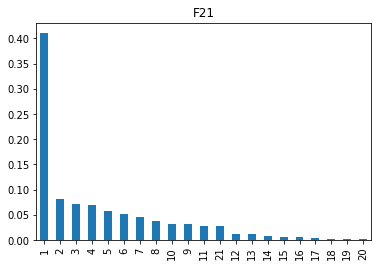

In [179]:
print(train['F21'].value_counts(normalize=True)*100)   # percentage wise
train['F21'].value_counts(normalize=True).plot.bar(title = "F21")

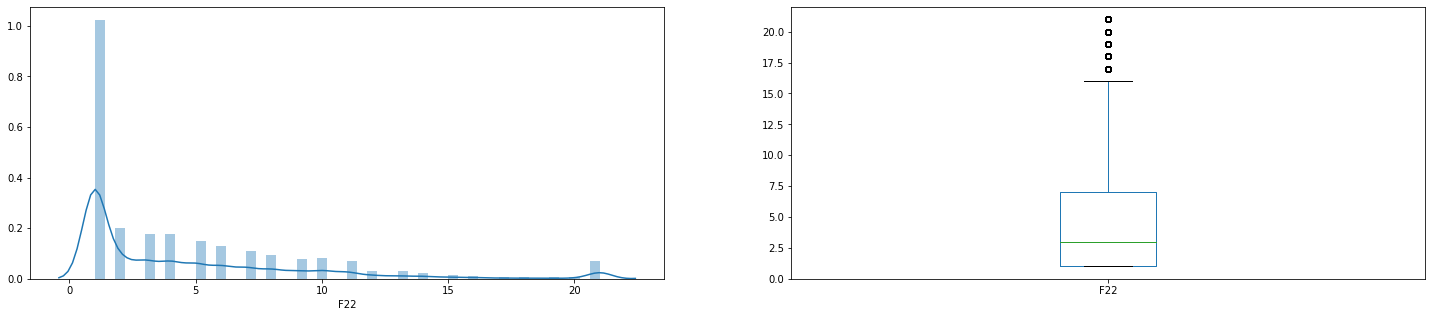

In [180]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(train['F22']);
plt.subplot(122)
train['F22'].plot.box(figsize=(25,5)) 
plt.show()

1     40.925084
2      7.954141
3      7.114054
4      7.020162
5      5.998221
6      5.184819
7      4.466298
8      3.773473
10     3.234829
9      3.130065
21     2.838506
11     2.769322
12     1.303617
13     1.170192
14     0.992291
15     0.629571
16     0.519866
17     0.274758
18     0.258944
20     0.223364
19     0.218423
Name: F22, dtype: float64


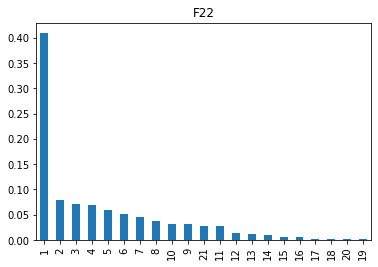

In [181]:
print(train['F22'].value_counts(normalize=True)*100)   # percentage wise
train['F22'].value_counts(normalize=True).plot.bar(title = "F22")

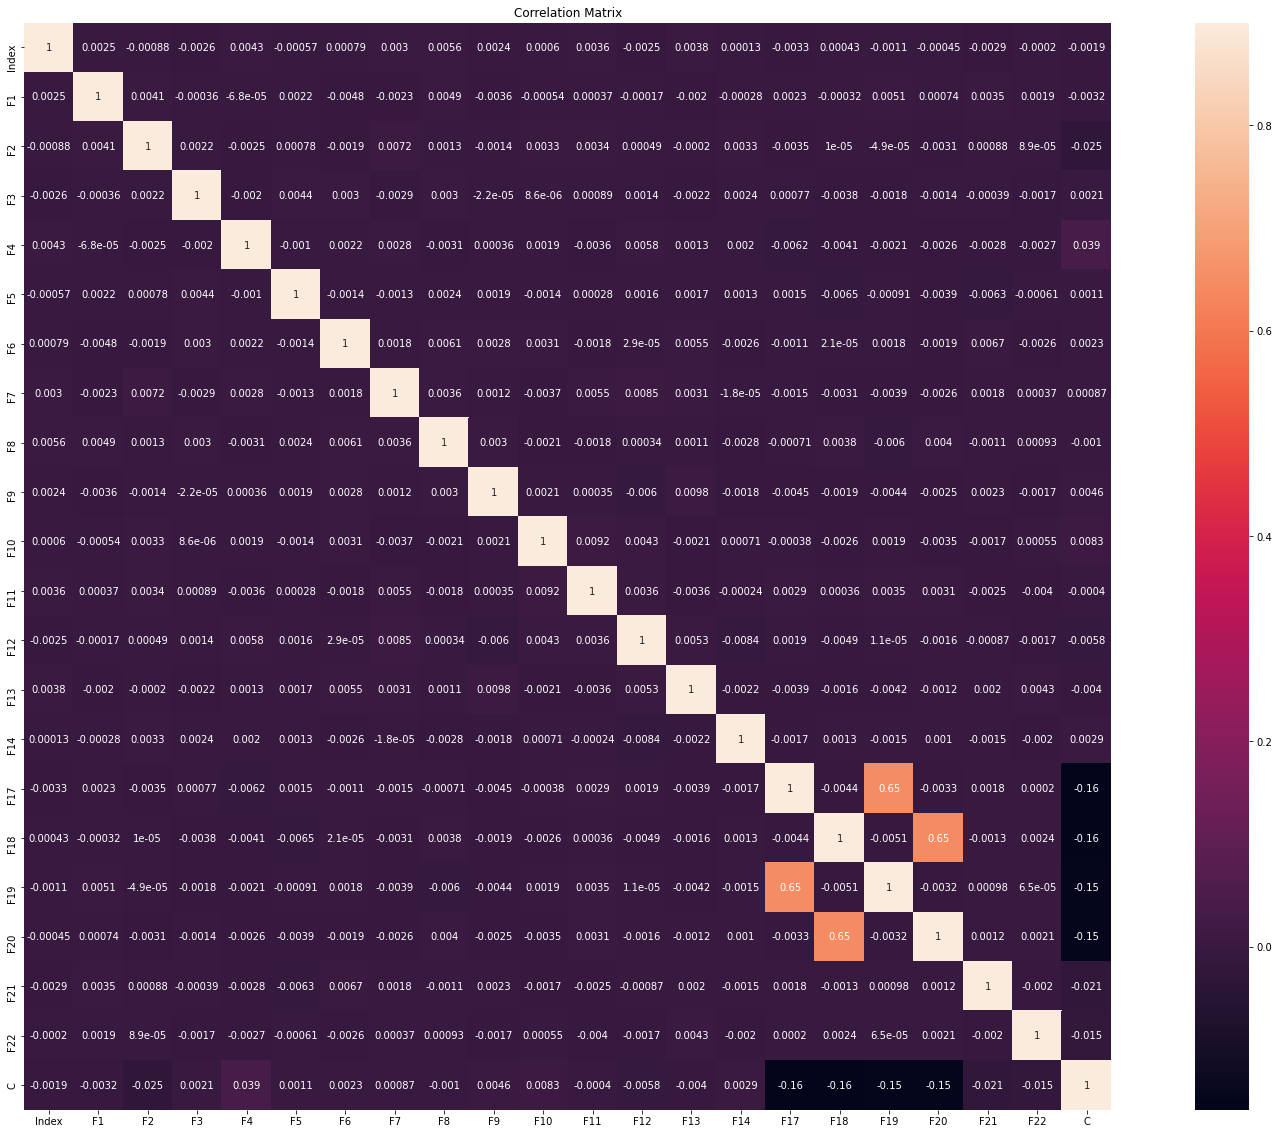

In [182]:
corrmat = train.corr()
plt.subplots(figsize=(30, 20))
plt.title('Correlation Matrix')
sns.heatmap(corrmat, vmax=.9, annot = True ,square=True)

F18 and F20, F17 and F19 are highly correlated

In [183]:

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF_train = train[train.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF_train)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Index, F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, F17, F18, F19, F20, F21, F22, C]
Index: []


In [184]:
# checking missing data percentage in data
def misssing_values(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  return missing_Data

In [185]:
data_missing = misssing_values(train)
print("Missing values in train Data\n")

Missing values in train Data



In [186]:
data_missing

Total  Percent
C          0      0.0
F22        0      0.0
F1         0      0.0
F2         0      0.0
F3         0      0.0
F4         0      0.0
F5         0      0.0
F6         0      0.0
F7         0      0.0
F8         0      0.0
F9         0      0.0
F10        0      0.0
F11        0      0.0
F12        0      0.0
F13        0      0.0
F14        0      0.0
F15        0      0.0
F16        0      0.0
F17        0      0.0
F18        0      0.0
F19        0      0.0
F20        0      0.0
F21        0      0.0
Index      0      0.0

In [187]:
train.head()

Index        F1        F2        F3        F4  ...  F19  F20  F21  F22  C
0      1  0.224506  0.500340  0.489860  0.902413  ...  706  305    1    2  0
1      2  0.321128  0.281119  0.907283  0.772159  ...  423  206   18    7  1
2      3  0.893441  0.622005  0.998776  0.098386  ...  703  315    1    4  0
3      4  0.320641  0.957234  0.346000  0.646479  ...  122  304   15    1  0
4      5  0.475961  0.623008  0.544988  0.159709  ...  486  240    1    1  0

[5 rows x 24 columns]

In [188]:
# train["C"] = train["C"].astype('category')

In [189]:
train.head()

Index        F1        F2        F3        F4  ...  F19  F20  F21  F22  C
0      1  0.224506  0.500340  0.489860  0.902413  ...  706  305    1    2  0
1      2  0.321128  0.281119  0.907283  0.772159  ...  423  206   18    7  1
2      3  0.893441  0.622005  0.998776  0.098386  ...  703  315    1    4  0
3      4  0.320641  0.957234  0.346000  0.646479  ...  122  304   15    1  0
4      5  0.475961  0.623008  0.544988  0.159709  ...  486  240    1    1  0

[5 rows x 24 columns]

In [190]:
train.dtypes

Index      int64
F1       float64
F2       float64
F3       float64
F4       float64
F5         int64
F6         int64
F7         int64
F8         int64
F9         int64
F10        int64
F11        int64
F12        int64
F13        int64
F14        int64
F15       object
F16       object
F17        int64
F18        int64
F19        int64
F20        int64
F21        int64
F22        int64
C          int64
dtype: object

In [191]:
train.info

<bound method DataFrame.info of          Index        F1        F2        F3        F4  ...  F19  F20  F21  F22  C
0            1  0.224506  0.500340  0.489860  0.902413  ...  706  305    1    2  0
1            2  0.321128  0.281119  0.907283  0.772159  ...  423  206   18    7  1
2            3  0.893441  0.622005  0.998776  0.098386  ...  703  315    1    4  0
3            4  0.320641  0.957234  0.346000  0.646479  ...  122  304   15    1  0
4            5  0.475961  0.623008  0.544988  0.159709  ...  486  240    1    1  0
...        ...       ...       ...       ...       ...  ...  ...  ...  ...  ... ..
101175  101176  0.131724  0.146060  0.933111  0.576140  ...  709  454    6    1  1
101176  101177  0.621812  0.873482  0.079753  0.197784  ...  508  264    5    1  0
101177  101178  0.909137  0.521869  0.233667  0.879493  ...  475   21    2    4  0
101178  101179  0.901495  0.546203  0.610663  0.805136  ...  189  351    1    1  0
101179  101180  0.868519  0.187581  0.746064  0.608884 

BIVARIATE ANALYSIS

<Figure size 720x720 with 0 Axes>

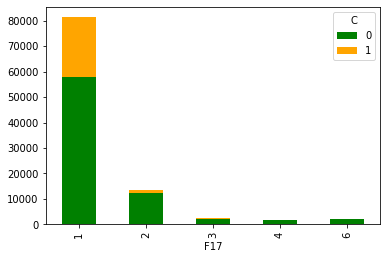

In [192]:
plt.figure(figsize=(10,10))
df = pd.crosstab(train['F17'],train['C'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

<Figure size 720x720 with 0 Axes>

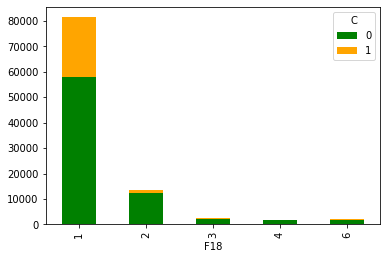

In [193]:
plt.figure(figsize=(10,10))
df = pd.crosstab(train['F18'],train['C'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

<Figure size 720x720 with 0 Axes>

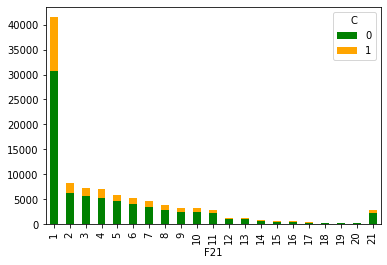

In [194]:
plt.figure(figsize=(10,10))
df = pd.crosstab(train['F21'],train['C'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

<Figure size 720x720 with 0 Axes>

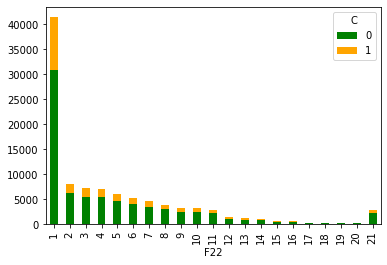

In [195]:
plt.figure(figsize=(10,10))
df = pd.crosstab(train['F22'],train['C'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

In [196]:
type(train['F15'][670])

str

In [197]:
train['date_1']=pd.to_datetime(train['F15'])

In [198]:
train['date_2']=pd.to_datetime(train['F16'])

FEATURE ENGINEERING

In [199]:
# try:
#   train['date_1']=pd.to_datetime(train['F15'],format='%m/%d/%y',dayfirst=True)
#   train['date_2']=pd.to_datetime(train['F16'],format='%m/%d/%y',dayfirst=True)
# except Exception as e:
#   print(e)

Put the 86 string data into try catch and convert them

In [200]:
try:
  # Duration of Gaps
  train['Gaps_Duration_by_days']=(train['date_2']-train['date_1'])/np.timedelta64(1,'D')
  train['Gaps_Duration_by_month']=(train['date_2']-train['date_1'])/np.timedelta64(1,'M')
  train['Gaps_Duration_by_week']=(train['date_2']-train['date_1'])/np.timedelta64(1,'W')
except Exception as e:
  print(e)

In [201]:
train.head()

Index        F1  ...  Gaps_Duration_by_month  Gaps_Duration_by_week
0      1  0.224506  ...               71.097969             309.142857
1      2  0.321128  ...               46.358241             201.571429
2      3  0.893441  ...              -25.692519            -111.714286
3      4  0.320641  ...              123.698639             537.857143
4      5  0.475961  ...              -17.675928             -76.857143

[5 rows x 29 columns]

In [202]:
train.dtypes

Index                              int64
F1                               float64
F2                               float64
F3                               float64
F4                               float64
F5                                 int64
F6                                 int64
F7                                 int64
F8                                 int64
F9                                 int64
F10                                int64
F11                                int64
F12                                int64
F13                                int64
F14                                int64
F15                               object
F16                               object
F17                                int64
F18                                int64
F19                                int64
F20                                int64
F21                                int64
F22                                int64
C                                  int64
date_1          

In [203]:
train = train.drop(["date_1","date_2", "F15", "F16"],axis=1)

In [204]:
train = train.drop("Index",axis=1)

In [205]:
X=train.drop("C",1)

In [206]:
y=train[["C"]]

In [207]:
len(X), len(y)

(101180, 101180)

In [208]:
X.head()

F1        F2  ...  Gaps_Duration_by_month  Gaps_Duration_by_week
0  0.224506  0.500340  ...               71.097969             309.142857
1  0.321128  0.281119  ...               46.358241             201.571429
2  0.893441  0.622005  ...              -25.692519            -111.714286
3  0.320641  0.957234  ...              123.698639             537.857143
4  0.475961  0.623008  ...              -17.675928             -76.857143

[5 rows x 23 columns]

In [209]:
y.head()

C
0  0
1  1
2  0
3  0
4  0

FEATURE SCALING

In [210]:

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

from sklearn import preprocessing
import seaborn as sns


In [211]:
# create list of column names to use later
col_names = list(X.columns)

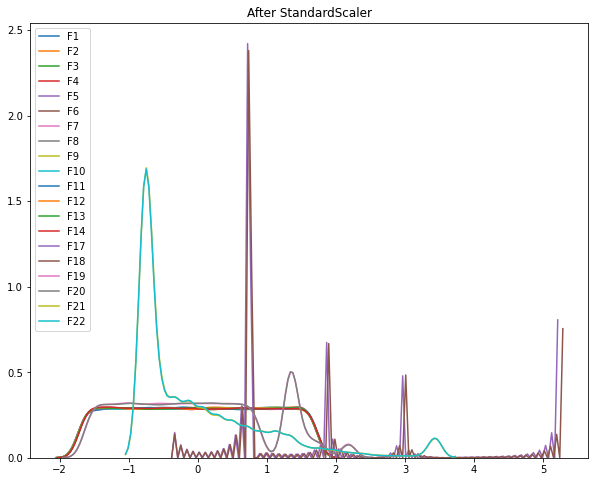

In [212]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(X)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_s['F1'], ax=ax1)
sns.kdeplot(df_s['F2'], ax=ax1)
sns.kdeplot(df_s['F3'], ax=ax1)
sns.kdeplot(df_s['F4'], ax=ax1)
sns.kdeplot(df_s['F5'], ax=ax1)
sns.kdeplot(df_s['F6'], ax=ax1)

sns.kdeplot(df_s['F7'], ax=ax1)
sns.kdeplot(df_s['F8'], ax=ax1)
sns.kdeplot(df_s['F9'], ax=ax1)
sns.kdeplot(df_s['F10'], ax=ax1)
sns.kdeplot(df_s['F11'], ax=ax1)
sns.kdeplot(df_s['F12'], ax=ax1)
sns.kdeplot(df_s['F13'], ax=ax1)
sns.kdeplot(df_s['F14'], ax=ax1)
sns.kdeplot(df_s['F17'], ax=ax1)
sns.kdeplot(df_s['F18'], ax=ax1)
sns.kdeplot(df_s['F19'], ax=ax1)
sns.kdeplot(df_s['F20'], ax=ax1)
sns.kdeplot(df_s['F21'], ax=ax1)
sns.kdeplot(df_s['F22'], ax=ax1);

Splitting the Dataset into Training and Test set


In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [214]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C= 0.001, penalty = 'l2', random_state = 1) 
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred_lr = classifier.predict(x_test)

In [215]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 50.44 %
Standard Deviation: 0.69 %


In [216]:
from sklearn.model_selection import GridSearchCV
parameters = [{"C":[0.001, 0.01, 0.1, 1, 10, 100], "penalty":["l1","l2"]}]# l1 lasso l2 ridge]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 50.44 %
Best Parameters: {'C': 0.001, 'penalty': 'l2'}


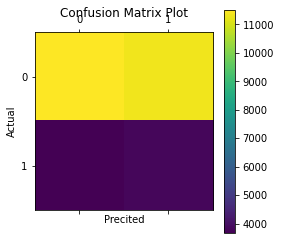

In [217]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.matshow(cm)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

ROC Area Under Curve is : 0.5064209707108333


Text(0.5, 0, 'False Positive Rate')

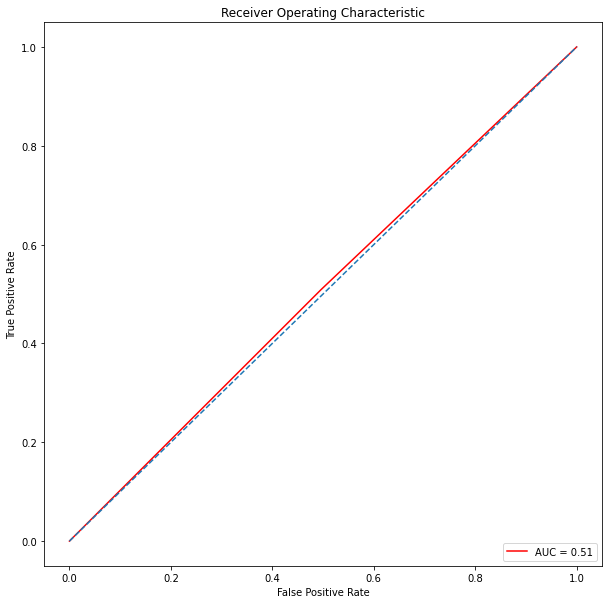

In [218]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Area Under Curve is :", roc_auc)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Random Forest